# Perceptron

The perceptron model is a more general computational model than McCulloch-Pitts neuron. It takes an input, aggregates it (weighted sum) and returns 1 only if the aggregated sum is more than some threshold else returns 0. Rewriting the threshold as shown above and making it a constant input with a variable weight, we would end up with something like the following:

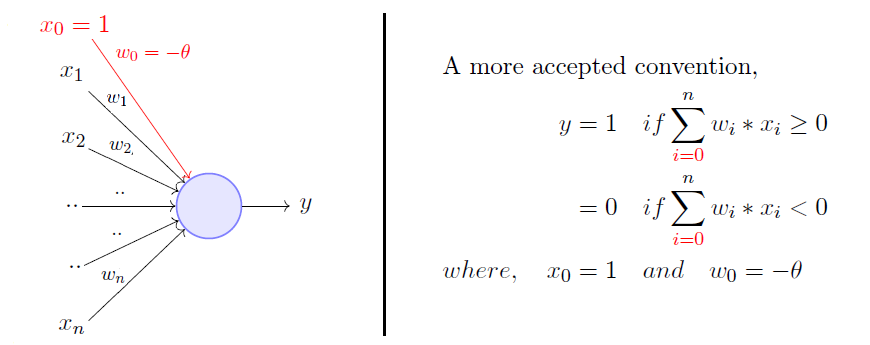

#### Components

#### Input

All the feature becomes the input for a perceptron. We denote the input of a perceptron by [x1, x2, x3, ..,xn], here x represent the feature value and n represent the total number of features. We also have special kind of input called the BIAS. In the image, we have described the value of bias as w0.
#### Weights

Weights are the values that are computed over the time of training the model. Initial we start the value of weights with some initial value and these values get updated for each training error. We represent the weights for perceptron by [w1,w2,w3,.. wn].
#### BIAS

A bias neuron allows a classifier to shift the decision boundary left or right. In an algebraic term, the bias neuron allows a classifier to translate its decision boundary. To translation is to “move every point a constant distance in a specified direction”.BIAS helps to training the model faster and with better quality.
#### Weighted Summation

Weighted Summation is the sum of value that we get after the multiplication of each weight [wn] associated the each feature value[xn]. We represent the weighted Summation by ∑wixi for all i -> [1 to n]
#### Step/Activation Function

The role of activation functions is make neural networks non-linear.For linerarly classification of example, it becomes necessary to make the perceptron as linear as possible.
#### Output

The weighted Summation is passed to the step/activation function and whatever value we get after computation is our predicted output.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [55]:
df = pd.read_csv('classification_in_asteroseismology.csv', header = 0)
df.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


In [56]:
X=df[['Dnu','numax','epsilon']]
Y=df['POP']
Y=np.where(Y ==1, 1, -1)

In [57]:
Y

array([ 1, -1,  1, ...,  1,  1,  1])

(array([288.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 713.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

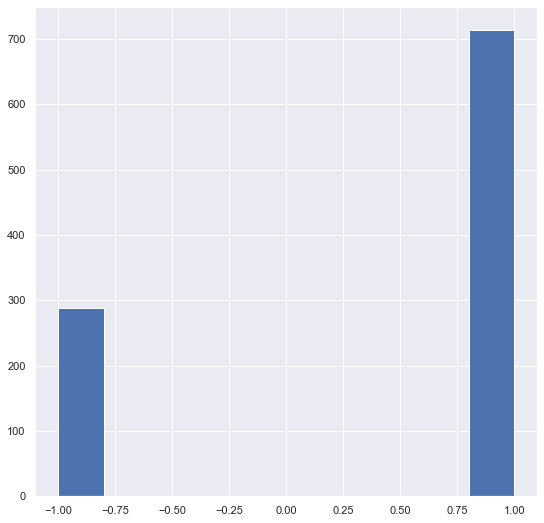

In [58]:
plt.hist(Y)

##  Correlation matrix

In [59]:
corr_mat = X.corr(method='pearson')

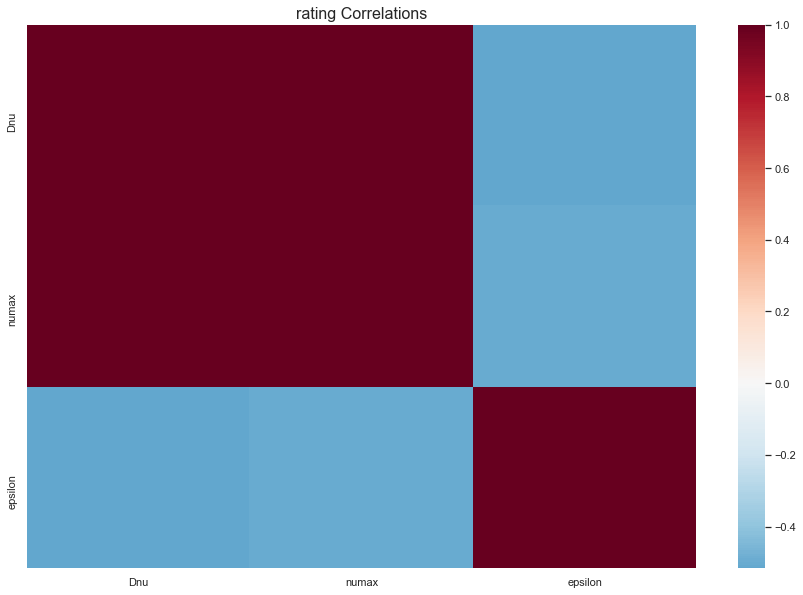

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, cmap='RdBu_r', center=0.0) 
plt.title('rating Correlations',fontsize=16)
plt.show() 

There exists relatively high correlation among those varaibles.  Since they have their own meanings, I will keep all of them

## Perception model

In [109]:

class Perception():
    def __init__(self,X,y,learning_rate=0.001,iterations=100):
        self.X=X
        self.y=np.array(y)
        self.n=len(y)
        self.lr=learning_rate
        self.ite=iterations
        self.w=np.array([0.0 for i in range(np.shape(self.X)[1])])
        self.b=0.0
        self.losses=[]
    
    def inner_prod_sign(self,inn_prod): # inner product sign

        if inn_prod > 0:
            return 1.0
        else:
            return -1.0

        
    def SP(self): #single layer perception
        for i in range(self.ite):
            loss = 0
            print('iteration times:',i+1)
#             w=self.w
#             b=self.b
            for xi, response in zip(self.X, self.y):
                update = self.lr * (response - self.inner_prod_sign(np.dot(xi, self.w) + self.b))
                self.w +=  update * xi
                self.b +=  update
            preds=[]
#             self.w=w
#             self.b=b
            for xi ,y in zip(self.X, self.y):
                preds.append(0.5*(y - self.inner_prod_sign(np.dot(xi, self.w) + self.b))**2)
            loss   =  np.mean(preds)
            self.losses.append(loss)
        print('loss function with iteration times (Perception algorithm)')
        plt.plot(self.losses)
        return
    def predict(self,X):
        preds=[]
#             self.w=w
#             self.b=b
        for xi in X:
            preds.append( self.inner_prod_sign(np.dot(xi, self.w) + self.b))


        return preds
        
        

In [110]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler
stdscalar =StandardScaler()
X_train =  stdscalar.fit_transform(X_train)
X_test =  stdscalar.transform(X_test)

iteration times: 1
iteration times: 2
iteration times: 3
iteration times: 4
iteration times: 5
iteration times: 6
iteration times: 7
iteration times: 8
iteration times: 9
iteration times: 10
iteration times: 11
iteration times: 12
iteration times: 13
iteration times: 14
iteration times: 15
iteration times: 16
iteration times: 17
iteration times: 18
iteration times: 19
iteration times: 20
iteration times: 21
iteration times: 22
iteration times: 23
iteration times: 24
iteration times: 25
iteration times: 26
iteration times: 27
iteration times: 28
iteration times: 29
iteration times: 30
iteration times: 31
iteration times: 32
iteration times: 33
iteration times: 34
iteration times: 35
iteration times: 36
iteration times: 37
iteration times: 38
iteration times: 39
iteration times: 40
iteration times: 41
iteration times: 42
iteration times: 43
iteration times: 44
iteration times: 45
iteration times: 46
iteration times: 47
iteration times: 48
iteration times: 49
iteration times: 50
iteration

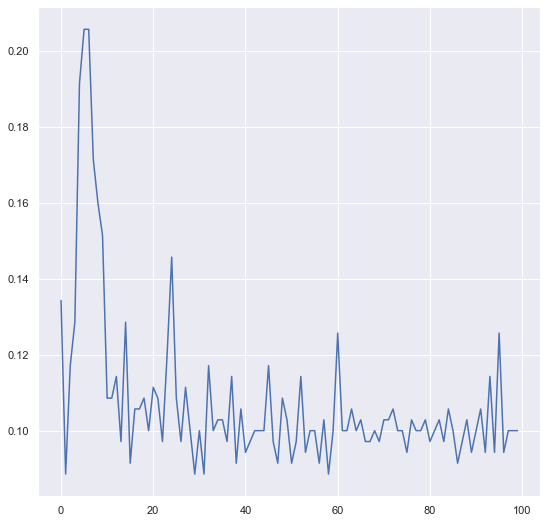

In [111]:
p=Perception(X_train,y_train)
p.SP()

The loss function decreases after few iterations.

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
y_pred = p.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.95        95
           1       0.97      0.99      0.98       206

    accuracy                           0.97       301
   macro avg       0.97      0.96      0.97       301
weighted avg       0.97      0.97      0.97       301

roc score: 0.9611394992335207


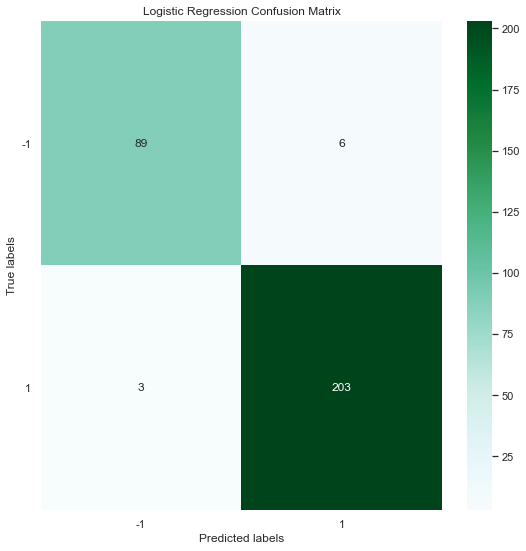

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
labels = ['-1','1']
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='BuGn') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

## Conclusion

Surprisingly, our simple perception algorithm performs well in this dataset with high roc score and good performance in confusion matrix.